# 微调向量模型

In [1]:
# ! pip3 install -r requirements_extra.txt

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
     ---------------------------------------- 0.0/92.1 kB ? eta -:--:--
     ---------------------------------------- 92.1/92.1 kB 5.5 MB/s eta 0:00:00
     ---------------------------------------- 0.0/17.0 MB ? eta -:--:--
     -------------- ------------------------- 6.3/17.0 MB 33.6 MB/s eta 0:00:01
     -------------------------- ------------ 11.7/17.0 MB 18.2 MB/s eta 0:00:01
     --------------------------------- ----- 14.8/17.0 MB 11.5 MB/s eta 0:00:01
     --------------------------------------  17.0/17.0 MB 14.2 MB/s eta 0:00:01
     --------------------------------------  17.0/17.0 MB 14.2 MB/s eta 0:00:01
     --------------------------------------  17.0/17.0 MB 14.2 MB/s eta 0:00:01
     ---------------------------------------- 17.0/17.0 MB 9.5 MB/s eta 0:00:00
     ---------------------------------------- 0.0/346.2 kB ? eta -:--:--
     ------------------------------------  337.9/346.2 kB 10.6 MB/s eta 0:00:01
  

ERROR: Ignored the following versions that require a different python version: 5.0.0 Requires-Python >=3.10; 5.0.0b1 Requires-Python >=3.10; 5.0.0b10 Requires-Python >=3.10; 5.0.0b5 Requires-Python >=3.10; 5.0.0b6 Requires-Python >=3.10; 5.0.0b7 Requires-Python >=3.10; 5.0.0b8 Requires-Python >=3.10; 5.0.0b9 Requires-Python >=3.10; 5.0.1 Requires-Python >=3.10; 5.0.2 Requires-Python >=3.10; 5.1.0 Requires-Python >=3.10; 5.10.0 Requires-Python >=3.10; 5.11.0 Requires-Python >=3.10; 5.12.0 Requires-Python >=3.10; 5.13.0 Requires-Python >=3.10; 5.13.1 Requires-Python >=3.10; 5.13.2 Requires-Python >=3.10; 5.14.0 Requires-Python >=3.10; 5.15.0 Requires-Python >=3.10; 5.16.0 Requires-Python >=3.10; 5.16.1 Requires-Python >=3.10; 5.16.2 Requires-Python >=3.10; 5.17.0 Requires-Python >=3.10; 5.17.1 Requires-Python >=3.10; 5.18.0 Requires-Python >=3.10; 5.19.0 Requires-Python >=3.10; 5.20.0 Requires-Python >=3.10; 5.20.1 Requires-Python >=3.10; 5.21.0 Requires-Python >=3.10; 5.22.0 Requires-Py

In [2]:
# ! pip3 install datasets==2.18.0 sentence-transformers==2.6.1

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
INFO: pip is looking at multiple versions of multiprocess to determine which version is compatible with other requirements. This could take a while.
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
  Attempting uninstall: dill
    Found existing installation: dill 0.4.0
    Uninstalling dill-0.4.0:
      Successfully uninstalled dill-0.4.0
  Attempting uninstall: multiprocess
    Found existing installation: multiprocess 0.70.18
    Uninstalling multiprocess-0.70.18:
      Successfully uninstalled multiprocess-0.70.18
  Attempting uninstall: sentence-transformers
    Found existing installation: sentence-transformers 4.1.0
    Uninstalling sentence-transformers-4.1.0:
      Successfully uninstalled sentence-transformers-4.1.0



[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
# ! pip3 install jupyter ipywidgets

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple



[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


# 一、使用Sentence Transformers微调向量模型

## 1.1 句对样本

In [5]:
from datasets import Dataset
sequence = [
    ['Datawhale是什么?','Datawhale是一个专注于数据科学与AI领域的开源组织。'],
    ['llm_universe是什么?','llm_universe是一个面向小白开发者的大模型应用开发教程。']
]

ds = Dataset.from_dict({"sequence": sequence})
print(ds[0])

{'sequence': ['Datawhale是什么?', 'Datawhale是一个专注于数据科学与AI领域的开源组织。']}


## 1.2 带分数的句对样本

In [6]:
premise = [
    'Datawhale是一个专注于数据科学与AI领域的开源组织。',
    'Datawhale是一个专注于数据科学与AI领域的开源组织。',
    'Datawhale是一个专注于数据科学与AI领域的开源组织。'
]
hypothesis = [
    '我今天很开心！',
    '我参加了Datawhale的组队学习' ,
    'Datawhale是一个开源组织。'
]

# 用0,1,2表示句子之间的相似程度, 分别为不相似、部分相似、相似
label = [0, 1, 2]

ds = Dataset.from_dict({
    "premise": premise,
    "hypothesis": hypothesis,
    "label": label
})
ds[0]

{'premise': 'Datawhale是一个专注于数据科学与AI领域的开源组织。',
 'hypothesis': '我今天很开心！',
 'label': 0}

## 1.3 三元组

In [8]:
anchor = ['我该怎么学习RAG？', '我要如何养花？']
positive = ['大家是怎么学习RAG的？', '养花时要注意什么？']
negative = ['RAG是什么？', '玫瑰花有多少种？']

ds = Dataset.from_dict({
    "anchor": anchor,
    "positive": positive,
    "negative": negative
})
print(ds[0])

{'anchor': '我该怎么学习RAG？', 'positive': '大家是怎么学习RAG的？', 'negative': 'RAG是什么？'}


## 1.4 带有标签的单句

In [9]:
question = ['Datawhale是什么?', 'llm_universe是什么?', '我今天的早餐是豆浆。', '我好想吃火锅呀！']
# 0:计算机、互联网,1:饮食
label = [0, 0, 1, 1]

ds = Dataset.from_dict({'question': question, 'label': label})
print(ds[0])

{'question': 'Datawhale是什么?', 'label': 0}


# 2. 微调并评估向量模型

In [12]:
# 加载模型
from sentence_transformers import SentenceTransformer
model = SentenceTransformer(
    model_name_or_path="BAAI/bge-small-zh-v1.5",
    device="cpu",
    cache_folder="./bge_small",
    trust_remote_code=True
)

In [13]:
# 加载数据集
from datasets import load_dataset

dataset = load_dataset(
    path='vegaviazhang/Med_QQpairs',
    cache_dir='./medical'
)

# 我们可以通过打印 dataset 来了解数据集结构
print(f"最初加载med_dataset结构为:\n{dataset}")
print(f"med_dataset中训练集结构为:\n{dataset['train']}")

labels = set()
for i in range(dataset['train'].num_rows):
    labels.add(dataset['train'][i]['label'])
print(f"med_dataset中标签类别为:\n{labels}")
print(f"med_dataset训练集中第一条数据为:\n{dataset['train'][0]}")

Generating train split: 1000 examples [00:00, 3190.46 examples/s]

最初加载med_dataset结构为:
DatasetDict({
    train: Dataset({
        features: ['question1', 'question2', 'label'],
        num_rows: 1000
    })
})
med_dataset中训练集结构为:
Dataset({
    features: ['question1', 'question2', 'label'],
    num_rows: 1000
})
med_dataset中标签类别为:
{0, 1}
med_dataset训练集中第一条数据为:
{'question1': '艾滋患者能用可善挺吗？', 'question2': 'JUNCTURE研究', 'label': 0}


$$L=\frac{1}{n}\sum_{i=1}^{n}\{(1-label_i)\frac{1}{2}(distance)^2+(label_i)\frac{1}{2}[max(0,margin-distance)]^2\}$$

- 其中 `distance = 1 - 余弦相似度`

In [17]:
from sentence_transformers import InputExample
from torch.utils.data import DataLoader
from sentence_transformers import losses
from sentence_transformers.evaluation import BinaryClassificationEvaluator

# shuffle
dataset = dataset.shuffle(seed=42)

# 数据集构造
examples = []
for i in range(dataset.num_rows):
    example = dataset[i]
    examples.append(InputExample(
        texts=[example["question1"], example["question2"]],
        label=example["label"]
    ))

# 数据集划分
train_examples = examples[:int(len(examples) * 0.8)]
dev_examples = examples[int(len(examples) * 0.8):]

# 转换为DataLoader形式
train_dataloader = DataLoader(
    train_examples,
    shuffle=True,
    batch_size=32
)

# 实例化损失函数
train_loss = losses.ContrastiveLoss(model=model)
# 实例化evaluator用于评估数据集上的效果
evaluator = BinaryClassificationEvaluator.from_input_examples(dev_examples, name="med-dev")
# 定义模型保存路径
model_save_path = "./medical_bge_small"
# 微调模型
model.fit(
    [(train_dataloader, train_loss)],
    evaluator=evaluator,
    epochs=10,
    output_path=model_save_path
)

Epoch: 100%|██████████| 10/10 [03:37<00:00, 21.74s/it]


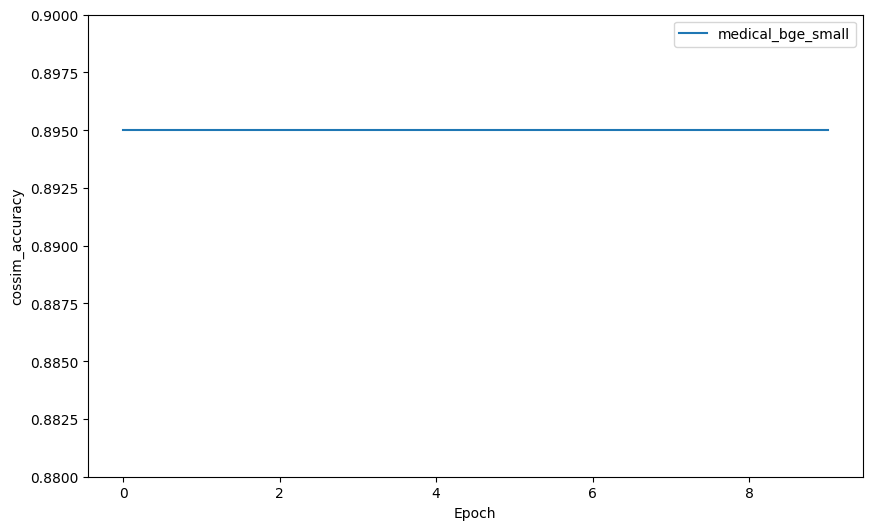

In [27]:
# 效果评估
import pandas as pd
from matplotlib import pyplot as plt

eval_small_df = pd.read_csv("./medical_bge_small/eval/binary_classification_evaluation_med-dev_results.csv")
plt.figure(figsize=(10, 6))
plt.plot(eval_small_df["epoch"], eval_small_df["cossim_accuracy"], label="medical_bge_small")
plt.xlabel("Epoch")
plt.ylabel("cossim_accuracy")
plt.ylim([0.88, 0.90])
plt.legend()
plt.show()

# 二、使用LLM构建数据集

In [28]:
# 加载数据
from langchain.document_loaders.pdf import PyMuPDFLoader

loader = PyMuPDFLoader("../data_base/knowledge_db/pumkin_book/pumpkin_book.pdf")

pdf_pages = loader.load()

train_pages = pdf_pages[13:15]

In [29]:
# 数据清洗
import re

def clean_text(text: str) -> str:
    # 删除每页开头与结尾标语及链接
    text = re.sub(r'→_→\n欢迎去各大电商平台选购纸质版南瓜书《机器学习公式详解》\n←_←', '', text)
    text = re.sub(r'→_→\n配套视频教程：https://www.bilibili.com/video/BV1Mh411e7VU\n←_←', '', text)

    # 删除字符串开头的空格
    text = re.sub(r'\s+', '', text)

    # 删除回车
    text = re.sub(r'\n+', '', text)

    return text

for page in train_pages:
    page.page_content = clean_text(page.page_content)

In [62]:
import generate_qa_pairs
import importlib
importlib.reload(generate_qa_pairs)

qa_pairs = generate_qa_pairs.docs_generate_qa_pairs(docs=train_pages, model="deepseek")

 50%|█████     | 1/2 [00:14<00:14, 14.88s/it]

问题1：  
问题：在机器学习中，“算法”和“模型”有什么区别？请结合上下文中的具体例子说明。  

原文内容1：  
“算法”是指从数据中学得“模型”的具体方法，例如后续章节中将会讲述的线性回归、对数几率回归、决策树等。“算法”产出的结果称为“模型”，通常是具体的函数或者可抽象地看作为函数，例如一元线性回归算法产出的模型即为形如f(x)=wx+b的一元一次函数。不过由于严格区分这两者的意义不大，因此多数文献和资料会将其混用，当遇到这两个概念时，其具体指代根据上下文判断即可。  

---  

问题2：  
问题：在机器学习中，样本的向量表示为什么通常需要数值化？请结合上下文中的例子解释。  

原文内容2：  
显然，用中文书写向量的方式不够“数学”，因此需要将属性值进一步数值化，具体例子参见“西瓜书”第3章3.2。此外，仅靠以上3个特征来刻画西瓜显然不够全面细致，因此还需要扩展更多维度的特征，一般称此类与特征处理相关的工作为“特征工程”。
----------------------------------------------------------------------------------------------------
{'query': '问题：在机器学习中，“算法”和“模型”有什么区别？请结合上下文中的具体例子说明。', 'answer': '“算法”是指从数据中学得“模型”的具体方法，例如后续章节中将会讲述的线性回归、对数几率回归、决策树等。“算法”产出的结果称为“模型”，通常是具体的函数或者可抽象地看作为函数，例如一元线性回归算法产出的模型即为形如f(x)=wx+b的一元一次函数。不过由于严格区分这两者的意义不大，因此多数文献和资料会将其混用，当遇到这两个概念时，其具体指代根据上下文判断即可。  \n\n---'}
----------------------------------------------------------------------------------------------------
{'query': '问题：在机器学习中，样本的向量表示为什么通常需要数值化？请结合上下文中的例子解释。', 'answer': '显然，用中文书写向量的方式不够“数学”，因此需要将属性值进一步数值化，具体例子参见“西瓜书”

100%|██████████| 2/2 [00:36<00:00, 18.35s/it]

问题1：  
**问题**：根据上下文，什么是机器学习中的“标记”？请举例说明分类任务和回归任务中标记的不同取值类型及其对应的数学表示。  

**原文内容1**：  
"标记：上文提到机器学习的本质就是在学习样本在某个方面的表现是否存在潜在的规律，我们称该方面的信息为“标记”。例如在学习西瓜的好坏时，“好瓜”和“坏瓜”便是样本的标记。一般第i个样本的标记的数学表示为yi，标记所在的空间称为“标记空间”或“输出空间”，数学表示为花式大写的Y。...  
•当标记取值为离散型时，称此类任务为“分类”...例如对于二分类任务，通常将正类记为1，反类记为0，即Y={0,1}...支持向量机算法则采用的是Y={−1,+1}；  
•当标记取值为连续型时，称此类任务为“回归”...回归任务的标记取值范围通常是整个实数域R，即Y=R。"  

---  

问题2：  
**问题**：上下文中提到的“泛化能力”是什么？结合西瓜分类的示例，对比模型fa(x)和fb(x)的泛化能力差异，并分析导致这种差异的原因。  

**原文内容2**：  
"泛化：由于机器学习的目标是根据已知来对未知做出尽可能准确的判断，因此对未知事物判断的准确与否才是衡量一个模型好坏的关键，我们称此为“泛化”能力。例如学习西瓜好坏时...模型fa(x)学到的规律是“色泽等于青绿、乌黑或者浅白时，同时根蒂蜷缩即为好瓜，否则便是坏瓜”...模型fb(x)学到的规律是“只要根蒂蜷缩就是好瓜”...此时我们称模型fb(x)的泛化能力优于模型fa(x)。...导致此现象最直接的原因是算法的不同...数据便是导致此现象的另一重要原因，这也就是机器学习领域常说的“数据决定模型的上限，而算法则是让模型无限逼近上限”。"
----------------------------------------------------------------------------------------------------


In [63]:
for i in range(len(qa_pairs.qa_pairs)):
    print('第{}个问题：{}'.format(i + 1, qa_pairs.qa_pairs[i]['query']))
    print('第{}个答案：{}'.format(i + 1, qa_pairs.qa_pairs[i]['answer']), end='\n\n')

第1个问题：问题：在机器学习中，“算法”和“模型”有什么区别？请结合上下文中的具体例子说明。
第1个答案：“算法”是指从数据中学得“模型”的具体方法，例如后续章节中将会讲述的线性回归、对数几率回归、决策树等。“算法”产出的结果称为“模型”，通常是具体的函数或者可抽象地看作为函数，例如一元线性回归算法产出的模型即为形如f(x)=wx+b的一元一次函数。不过由于严格区分这两者的意义不大，因此多数文献和资料会将其混用，当遇到这两个概念时，其具体指代根据上下文判断即可。  

---

第2个问题：问题：在机器学习中，样本的向量表示为什么通常需要数值化？请结合上下文中的例子解释。
第2个答案：显然，用中文书写向量的方式不够“数学”，因此需要将属性值进一步数值化，具体例子参见“西瓜书”第3章3.2。此外，仅靠以上3个特征来刻画西瓜显然不够全面细致，因此还需要扩展更多维度的特征，一般称此类与特征处理相关的工作为“特征工程”。



In [64]:
qa_pairs.save_json("train_dataset.json")

In [65]:
from generate_qa_pairs import QaPairs

qa_pairs = QaPairs.from_json('train_dataset.json')

In [66]:
# 将单个qa对转为InputExample并存入列表
examples = [
    InputExample(texts=[qa_pair["query"], qa_pair["answer"]]) for qa_pair in qa_pairs.qa_pairs
]
# 将数据集转换为DataLoader形式
train_dataloader = DataLoader(train_examples, shuffle=True, batch_size=32)